# PCAを用いた異常検知

## 多変数ガウス分布に従ってデータ生成

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

In [2]:
from sklearn.decomposition import PCA

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [5]:
mean = (4, 2, 3)
sigma = [[1, 0.7, 0.75], [0.7, 1, 0.3], [0.75, 0.3, 1]]
df = np.random.multivariate_normal(mean, sigma, 500)

## 主成分分析（PCA）

In [6]:
std = StandardScaler()
X = DataFrame(std.fit_transform(df))

In [7]:
# 最初の1/5を学習に用いる
pca = PCA()
pca.fit(X[0:round(X.shape[0] / 5)])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
Um = DataFrame(pca.components_[0:2, :]).T
S2 = np.identity(X.shape[1]) - Um.dot(Um.T)

In [9]:
def CalcAnomaly(x, S2):
    return x.T.dot(S2).dot(x)

In [10]:
a = [CalcAnomaly(X.iloc[i, :], S2) for i in range(X.shape[0])]   

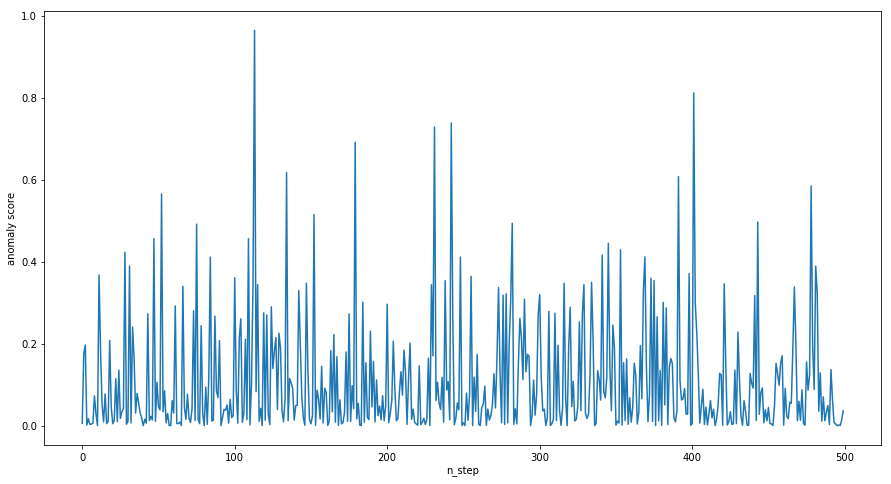

In [12]:
plt.figure(figsize = (15, 8))
plt.plot(a)
plt.xlabel('n_step')
plt.ylabel('anomaly score')

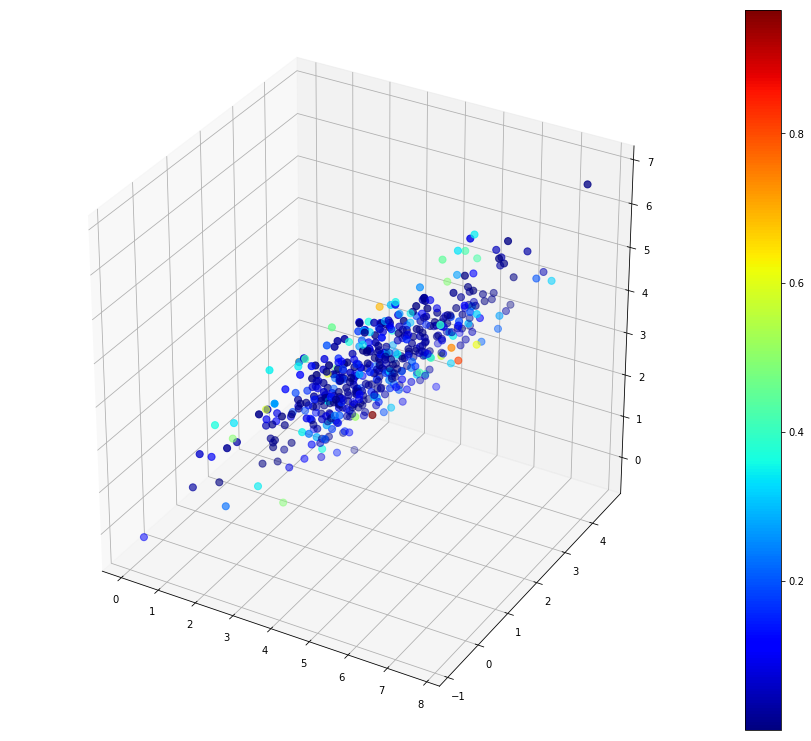

In [13]:
fig = plt.figure(figsize = (12, 10))
ax = Axes3D(fig)
p = ax.scatter(df[:, 0], df[:, 1], df[:, 2], marker = 'o', c = a, cmap = 'jet', s = 50)
fig.colorbar(p)